<a href="https://colab.research.google.com/github/Taiga-U/bug-free-umbrella/blob/main/makegraphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving slurm-252662.dat to slurm-252662.dat


{'slurm-252662.dat': b'   1   16     0.0100000    7        12487  2.132203e+01   -5.455161e-01  2.311951e-05   8.816964e-04  2.123959e-04   1.391678e+02  4.003610e-01   8.251676e+01  7.853554e-02   5.426785e+00  1.353695e-02   5.733347e+01  2.306373e-01   3.014300e-01  3.988935e-04   1.788444e-01  2.353123e-04  1.318721e+01  4.323209e-02  1.050047e+01  1.882229e-02  6.897105e+00  0.000000e+00  2.976486e+03  3.112131e-01\n   1   16     0.0200000    7         6502  1.056087e+01   -5.455876e-01  8.252196e-05   1.653460e-02  2.591414e-04   1.306276e+02  3.765579e-01   3.593864e+01  7.102770e-02   5.441704e+00  1.262373e-02   5.754893e+01  2.095073e-01   3.016773e-01  4.727689e-04   1.786641e-01  1.874134e-04  1.291692e+01  4.235669e-02  1.051118e+01  1.937760e-02  6.910505e+00  0.000000e+00  7.441586e+02  1.329460e-01\n   1   16     0.0500000    7         2805  4.340213e+00   -5.452544e-01  1.406968e-04   5.010826e-02  6.101863e-04   8.169472e+01  2.050200e-01   7.156182e+00  1.033798e-02 

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [5]:
data = np.loadtxt("./slurm-252662.dat")

In [13]:
temp = data[0:9,2]

energy16 = data[0:9,6]
energy_err16 = data[0:9,7]
energy32 = data[9:18,6]
energy_err32 = data[9:18,7]
energy64 = data[18:27,6]
energy_err64 = data[18:27,7]


usus16 = data[0:9,8]
usus_err16 = data[0:9,9]
usus32 = data[9:18,8]
usus_err32 = data[9:18,9]
usus64 = data[18:27,8]
usus_err64 = data[18:27,9]


ssus16 = data[0:9,10]
ssus_err16 = data[0:9,11]
ssus32 = data[9:18,10]
ssus_err32 = data[9:18,11]
ssus64 = data[18:27,10]
ssus_err64 = data[18:27,11]


dynamic_S16 = data[0:9,12]
dynamic_S_err16 = data[0:9,13]
dynamic_S32 = data[9:18,12]
dynamic_S_err32 = data[9:18,13]
dynamic_S64 = data[18:27,12]
dynamic_S_err64 = data[9:27,13]


static_S16 = data[0:9,14]
static_S_err16 = data[0:9,15]
static_S32 = data[9:18,14]
static_S_err32 = data[9:18,15]
static_S64 = data[18:27,14]
static_S_err64 = data[18:27,15]


Nz16 = data[0:9,16]
Nz_err16 = data[0:9,17]
Nz32 = data[9:18,16]
Nz_err32 = data[9:18,17]
Nz64 = data[18:27,16]
Nz_err64 = data[18:27,17]


static_S216 = data[0:9,18]
static_S2_err16 = data[0:9,19]
static_S232 = data[9:18,18]
static_S2_err32 = data[9:18,19]
static_S264 = data[18:27,18]
static_S2_err64 = data[18:27,19]


static_S316 = data[0:9,20]
static_S3_err16 = data[0:9,21]
static_S332 = data[9:18,20]
static_S3_err32 = data[9:18,21]
static_S364 = data[18:27,20]
static_S3_err64 = data[18:27,21]


inverse_gap16 = data[0:9,22]
inverse_gap_err16 = data[0:9,23]
inverse_gap32 = data[9:18,22]
inverse_gap_err32 = data[9:18,23]
inverse_gap64 = data[18:27,22]
inverse_gap_err64 = data[18:27,23]


correlation_length_x16 = data[0:9,24]
correlation_length_x_err16 = data[0:9,25]
correlation_length_x32 = data[9:18,24]
correlation_length_x_err32 = data[9:18,25]
correlation_length_x64 = data[18:27,24]
correlation_length_x_err64 = data[18:27,25]


correlation_length_y16 = data[0:9,26]
correlation_length_y_err16 = data[0:9,27]
correlation_length_y32 = data[9:18,26]
correlation_length_y_err32 = data[9:18,27]
correlation_length_y64 = data[18:27,26]
correlation_length_y_err64 = data[18:27,27]

In [ ]:
# 藤井 岳 キュリーワイスフィッティングの関数
def CW_fit(xx,yy,t_low,t_high,M_atom_number):
    temp_range = (t_low<xx)&(xx<t_high)
    
    def line(xx,a,c):
        yy = a*xx + c
        return yy
    
    results,err = optimize.curve_fit(line, xx[temp_range], yy[temp_range])
    # print(results)
    
    mu = 3*1.3806E-16*(1/(results[0]))/(6.022E+23)/(9.274E-21)**2
    # print(mu)
    return np.sqrt(mu/M_atom_number), -results[1]/results[0], results[0], results[1]

def line(xx,a,c):
        yy = a*xx + c
        return yy

In [14]:
#　グラフ微調整
plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14                       #フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


以下、個別にグラフを生成

Text(0, 0.5, 'Energy')

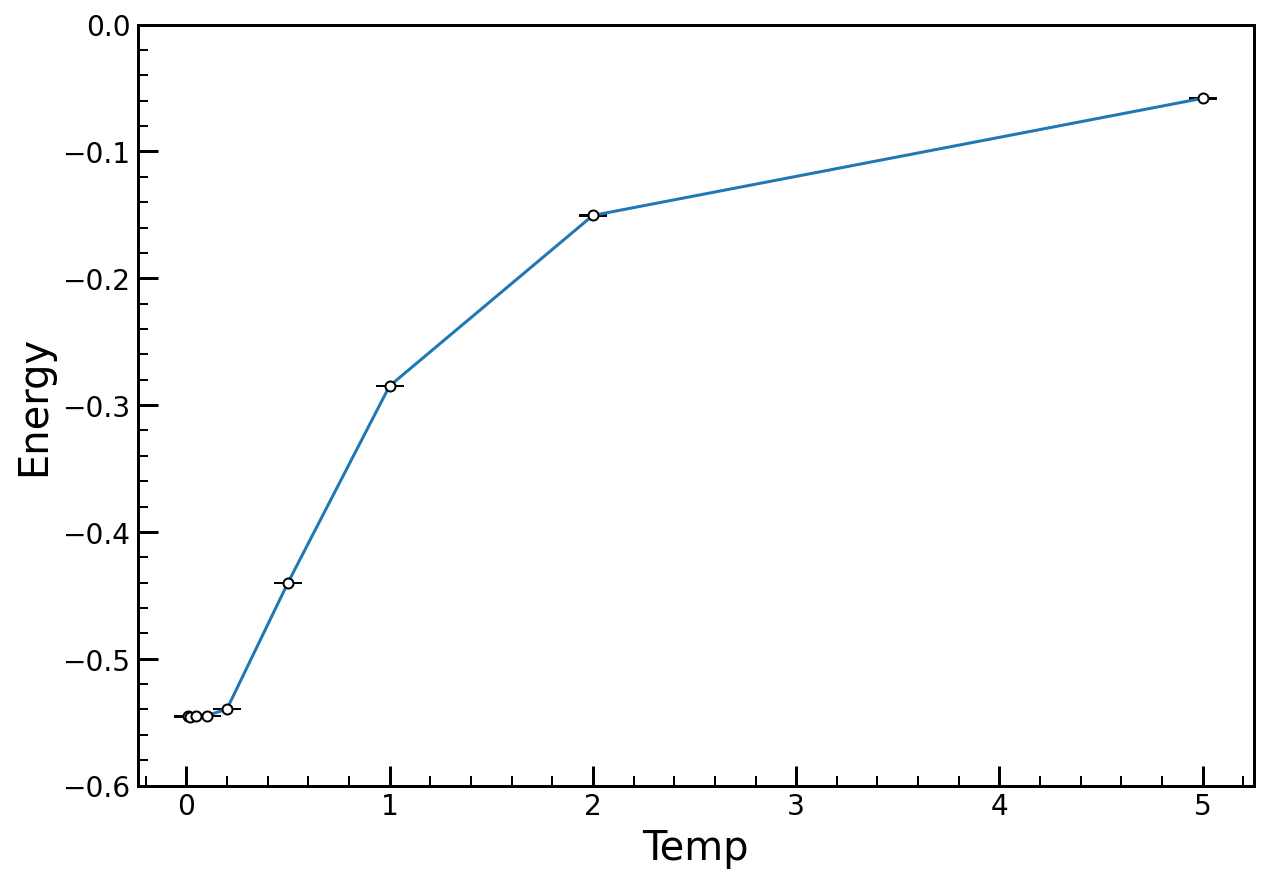

In [16]:
x = temp
y = energy16
y_err = energy_err16

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=7, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')

plt.plot(x, y)
plt.ylim(-0.6,0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('Energy', fontsize=20)


# plt.savefig('y_error_bar.png')

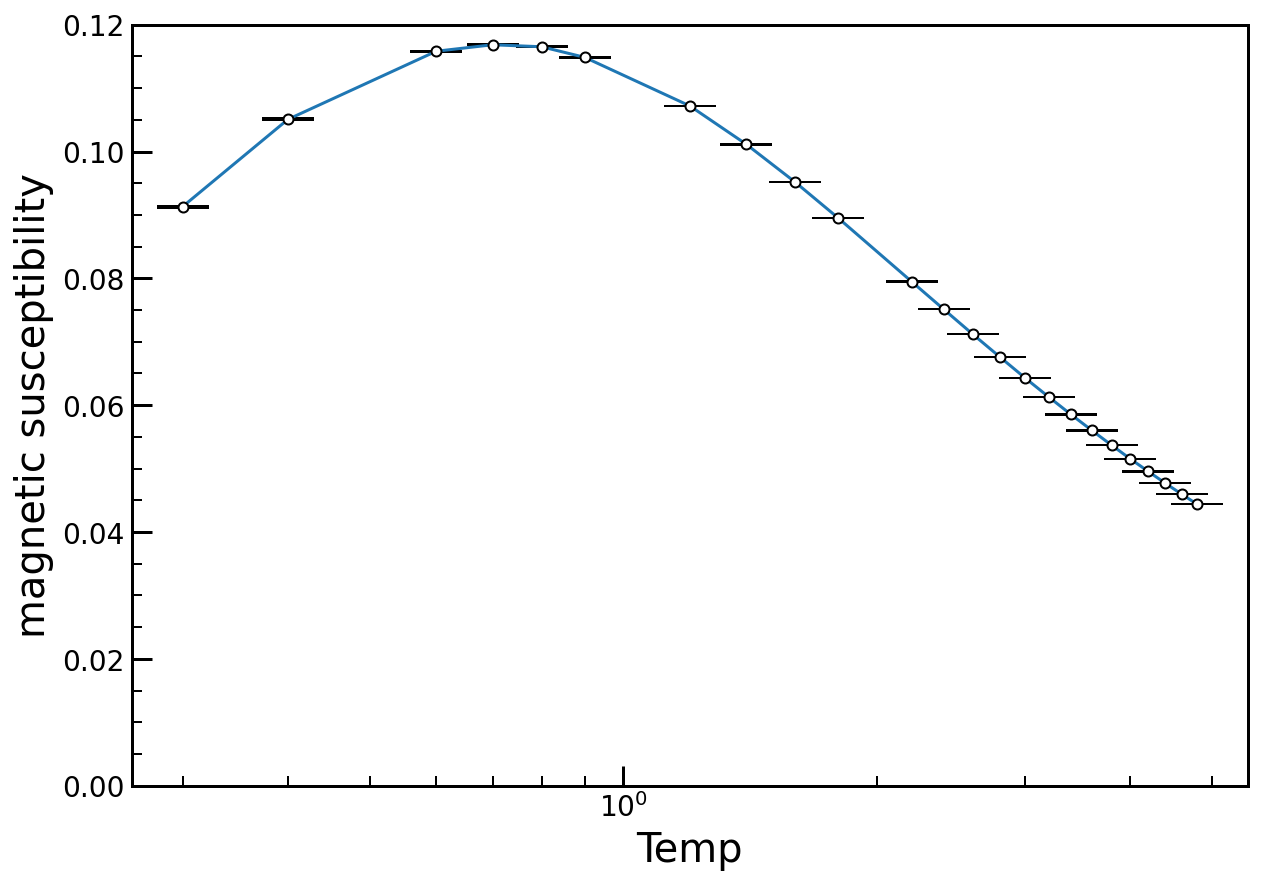

In [ ]:
x = temp
y = usus
y_err = usus_err

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')

plt.plot(x, y)
plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('magnetic susceptibility', fontsize=20)
plt.xscale('log')

# plt.savefig('y_error_bar.png')

Text(3, 3, 'C = 3.717')

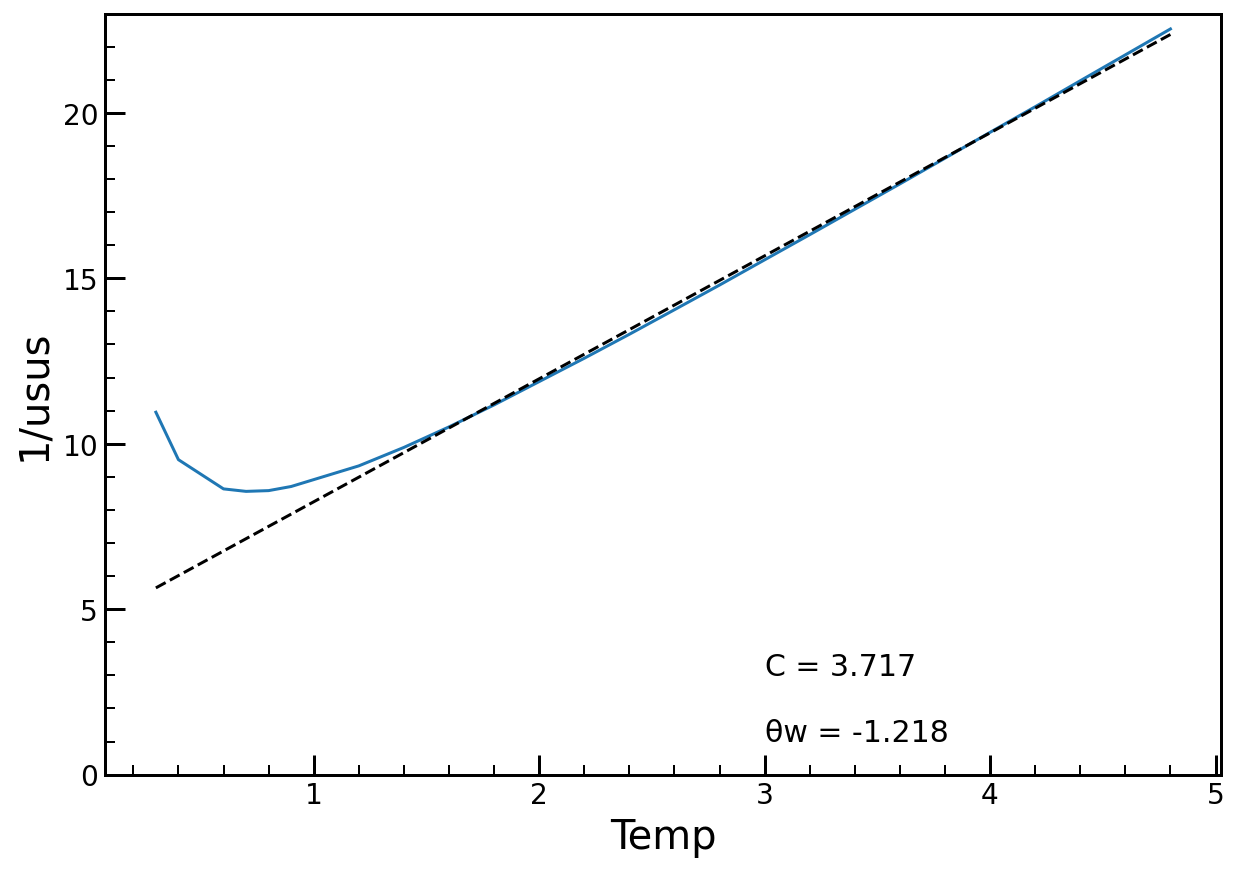

In [ ]:
x = temp
y = 1/usus
# y_err = usus_err

plt.figure(figsize=(10,7))

plt.plot(x, y)
plt.ylim(0,23)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('1/usus', fontsize=20)
# plt.xscale('log')

chaifit = CW_fit(x,y, 1,5,1)
xx = temp
yy = chaifit[2]*xx + chaifit[3]
plt.plot(xx,yy,"--",color = "0")
plt.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
plt.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'staggered susceptibility')

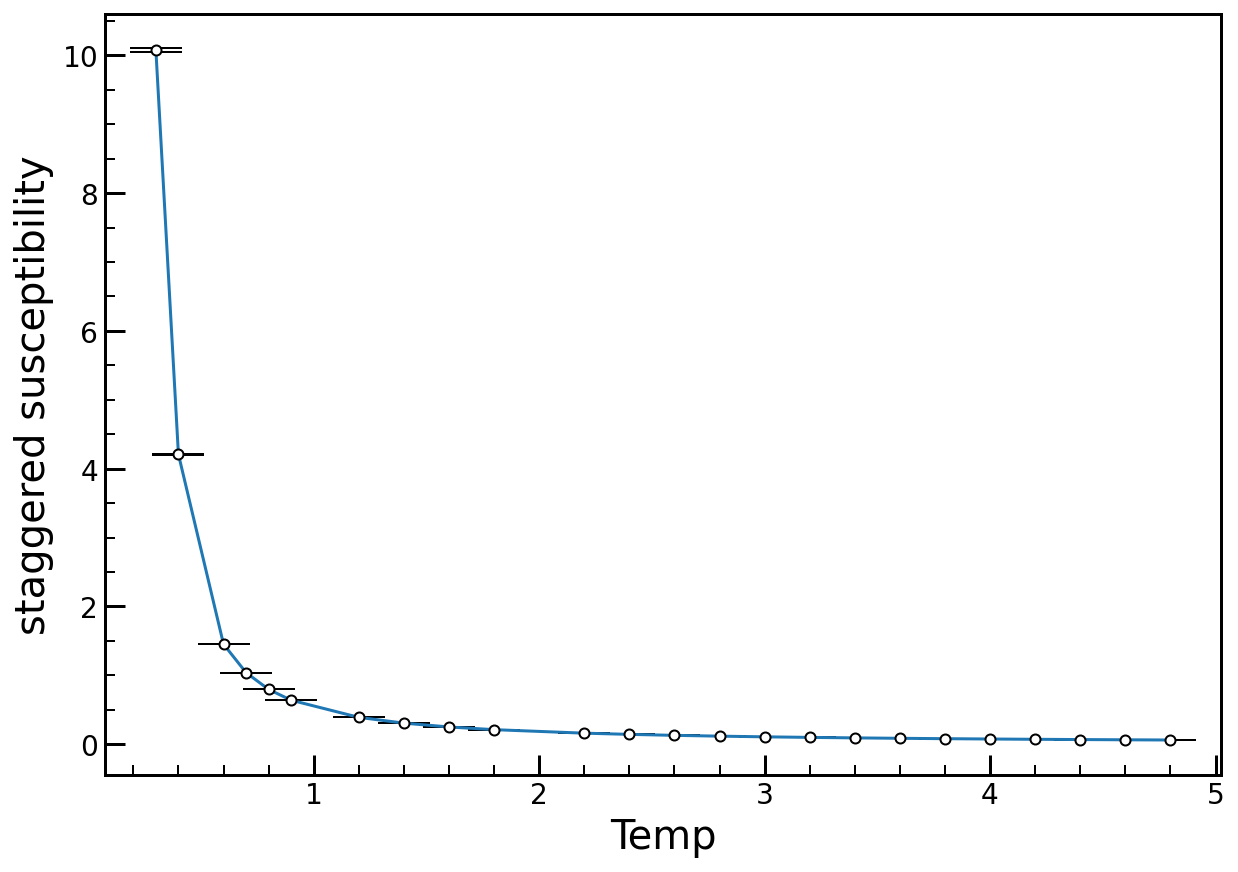

In [ ]:
x = temp
y = ssus
y_err = ssus_err

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('staggered susceptibility', fontsize=20)


# plt.savefig('y_error_bar.png')

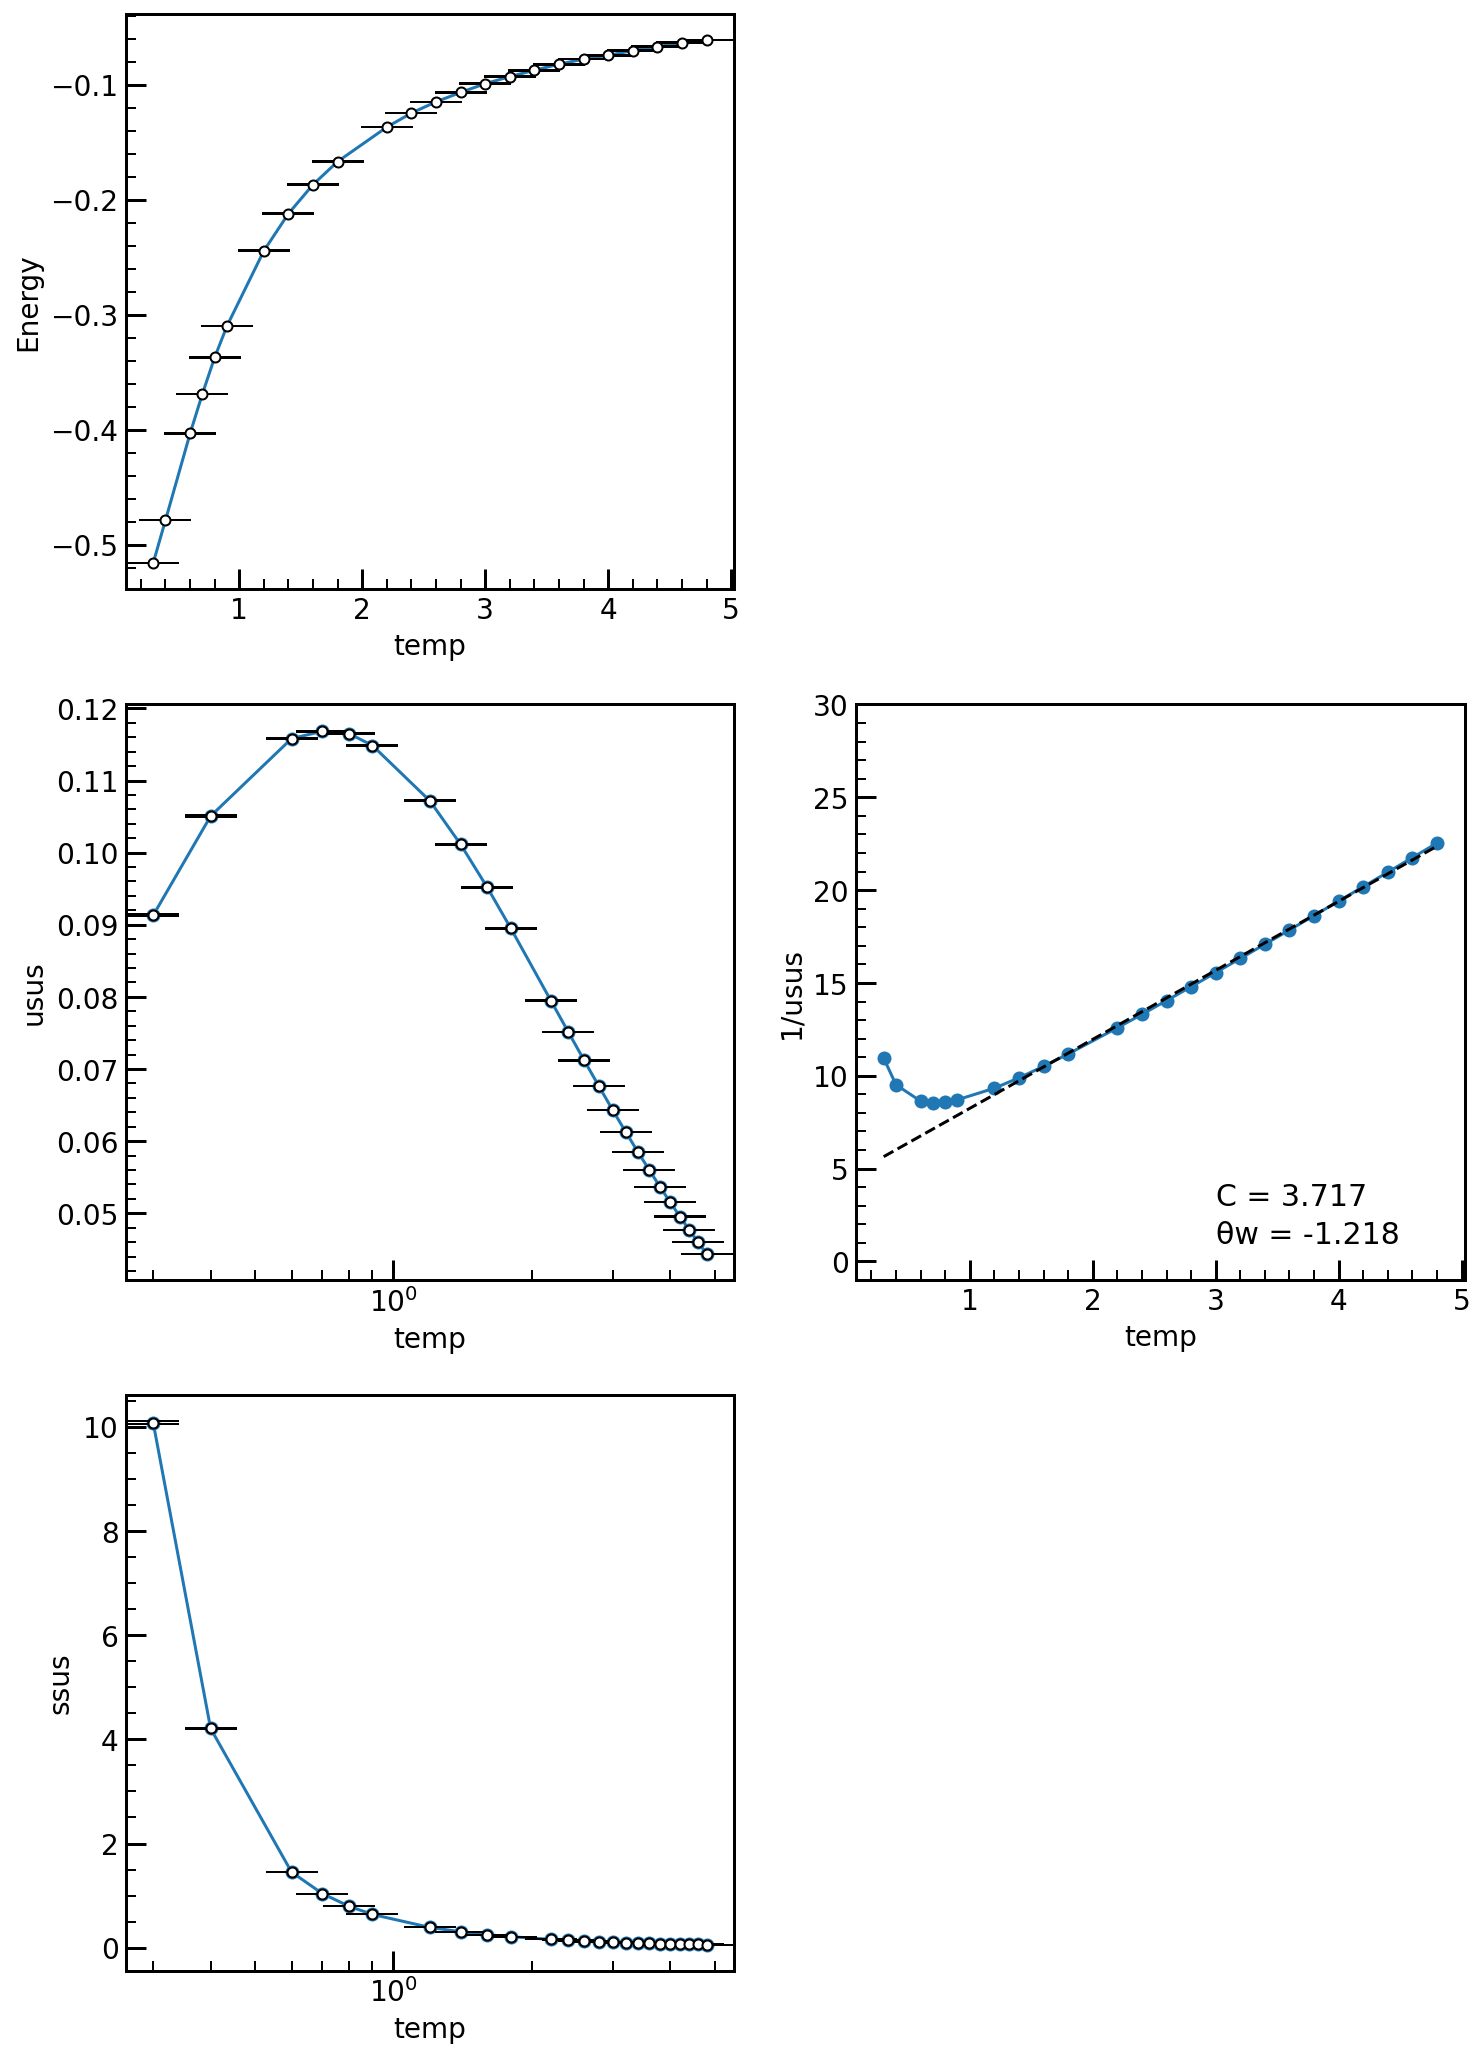

In [ ]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, energy)
ax1.errorbar(temp, energy, yerr = energy_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("Energy")
ax1.set_xlabel("temp")

ax3 = fig.add_subplot(gyou,retsu,3)
ax3.plot(temp, usus, marker ='o', label="test")
ax3.errorbar(temp, usus, yerr = usus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.set_ylabel("usus")
ax3.set_xscale('log')
ax3.set_xlabel("temp")


ax4 = fig.add_subplot(gyou,retsu,4)
ax4.plot(temp, 1/usus, marker ='o', label="test")
ax4.set_ylabel("1/usus")
ax4.set_xlabel("temp")
ax4.set_ylim(-1,30)
# ax4.set_ylim(-1,22)
#以下は最小二乗法
chaifit = CW_fit(temp,1/usus, 1,5,1)
x = temp
y = chaifit[2]*x + chaifit[3]
ax4.plot(x,y,"--",color = "0")
ax4.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
ax4.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

ax5 = fig.add_subplot(gyou,retsu,5)
ax5.plot(temp, ssus, marker ='o', label="test")
ax5.errorbar(temp, ssus, yerr = ssus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.set_ylabel("ssus")
# ax2.set_xlim(0,1)
ax5.set_xscale('log')
ax5.set_xlabel("temp")

# ax6 = fig.add_subplot(gyou,retsu,6)
# ax6.plot(temp, 1/ssus, marker ='o', label="test")
# ax6.set_ylabel("1/ssus")
# # ax6.set_xscale('log')
# ax6.set_xlabel("temp")
# #以下は最小二乗法
# chaifit = CW_fit(temp,1/ssus, 1,5,1)
# x = temp
# y = chaifit[2]*x + chaifit[3]
# ax6.plot(x,y,"--",color = "0")
# ax6.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
# ax6.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

plt.show()

Text(0.5, 0, 'temp')

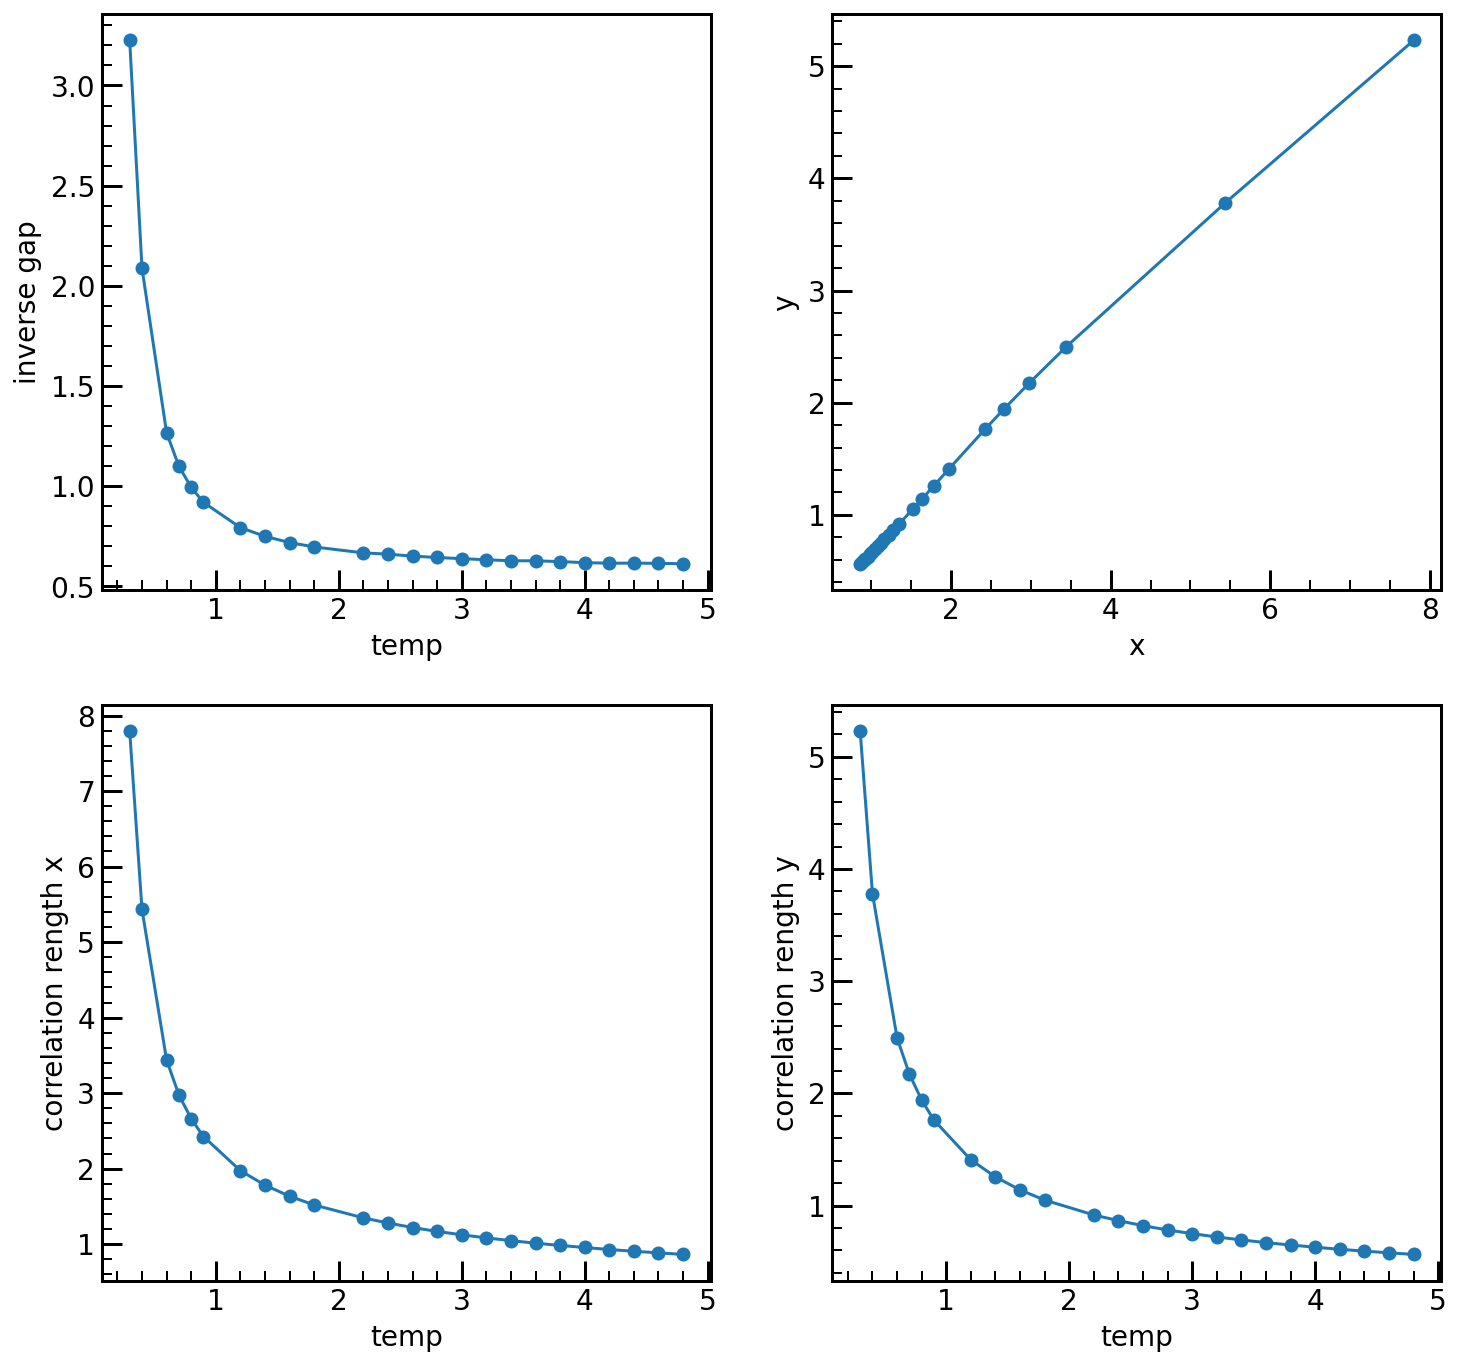

In [ ]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, inverse_gap, marker ='o', label="test")
ax1.set_ylabel("inverse gap")
ax1.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,2)
ax2.plot(correlation_length_x, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("y")
ax2.set_xlabel("x")

ax2 = fig.add_subplot(gyou,retsu,3)
ax2.plot(temp, correlation_length_x, marker ='o', label="test")
ax2.set_ylabel("correlation rength x")
ax2.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,4)
ax2.plot(temp, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("correlation rength y")
ax2.set_xlabel("temp")